<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчёта-эффективности-обогащения" data-toc-modified-id="Проверка-расчёта-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка расчёта эффективности обогащения</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-расчёта-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-расчёта-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для расчёта итоговой sMAPE</a></span></li><li><span><a href="#Обучим-несколько-моделей-и-оценим-их-качество-кросс-валидацией." data-toc-modified-id="Обучим-несколько-моделей-и-оценим-их-качество-кросс-валидацией.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим несколько моделей и оценим их качество кросс-валидацией.</a></span></li><li><span><a href="#Расчёт-по-выбранной-модели" data-toc-modified-id="Расчёт-по-выбранной-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчёт по выбранной модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor


In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # index_col=['date']) 
test = pd.read_csv('/datasets/gold_recovery_test_new.csv') #index_col=['date'])
fullnew = pd.read_csv('/datasets/gold_recovery_full_new.csv') #index_col=['date'])
pd.set_option('display.max_columns', None)
display(train.head())
display(test.head())
display(fullnew.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [3]:
display(train.describe())
display(test.describe())
display(fullnew.describe())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

In [4]:
display(train.info())
display(test.info())
display(fullnew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

array([[<AxesSubplot:title={'center':'final.output.concentrate_ag'}>,
        <AxesSubplot:title={'center':'final.output.concentrate_pb'}>,
        <AxesSubplot:title={'center':'final.output.concentrate_sol'}>,
        <AxesSubplot:title={'center':'final.output.concentrate_au'}>,
        <AxesSubplot:title={'center':'final.output.recovery'}>,
        <AxesSubplot:title={'center':'final.output.tail_ag'}>,
        <AxesSubplot:title={'center':'final.output.tail_pb'}>,
        <AxesSubplot:title={'center':'final.output.tail_sol'}>,
        <AxesSubplot:title={'center':'final.output.tail_au'}>],
       [<AxesSubplot:title={'center':'primary_cleaner.input.sulfate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.depressant'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.feed_size'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.xanthate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.output.concentrate_ag'}>,
        <AxesSubplot:title=

array([[<AxesSubplot:title={'center':'primary_cleaner.input.sulfate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.depressant'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.feed_size'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.xanthate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_a_air'}>,
        <AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_a_level'}>,
        <AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_b_air'}>],
       [<AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_b_level'}>,
        <AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_c_air'}>,
        <AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_c_level'}>,
        <AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_d_air'}>,
        <AxesSubplot:title={'center':'primary_cleaner.state.floatbank8_d_level'}>,
        <AxesSubplot:title={'center':'rougher.inp

array([[<AxesSubplot:title={'center':'final.output.concentrate_ag'}>,
        <AxesSubplot:title={'center':'final.output.concentrate_pb'}>,
        <AxesSubplot:title={'center':'final.output.concentrate_sol'}>,
        <AxesSubplot:title={'center':'final.output.concentrate_au'}>,
        <AxesSubplot:title={'center':'final.output.recovery'}>,
        <AxesSubplot:title={'center':'final.output.tail_ag'}>,
        <AxesSubplot:title={'center':'final.output.tail_pb'}>,
        <AxesSubplot:title={'center':'final.output.tail_sol'}>,
        <AxesSubplot:title={'center':'final.output.tail_au'}>],
       [<AxesSubplot:title={'center':'primary_cleaner.input.sulfate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.depressant'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.feed_size'}>,
        <AxesSubplot:title={'center':'primary_cleaner.input.xanthate'}>,
        <AxesSubplot:title={'center':'primary_cleaner.output.concentrate_ag'}>,
        <AxesSubplot:title=

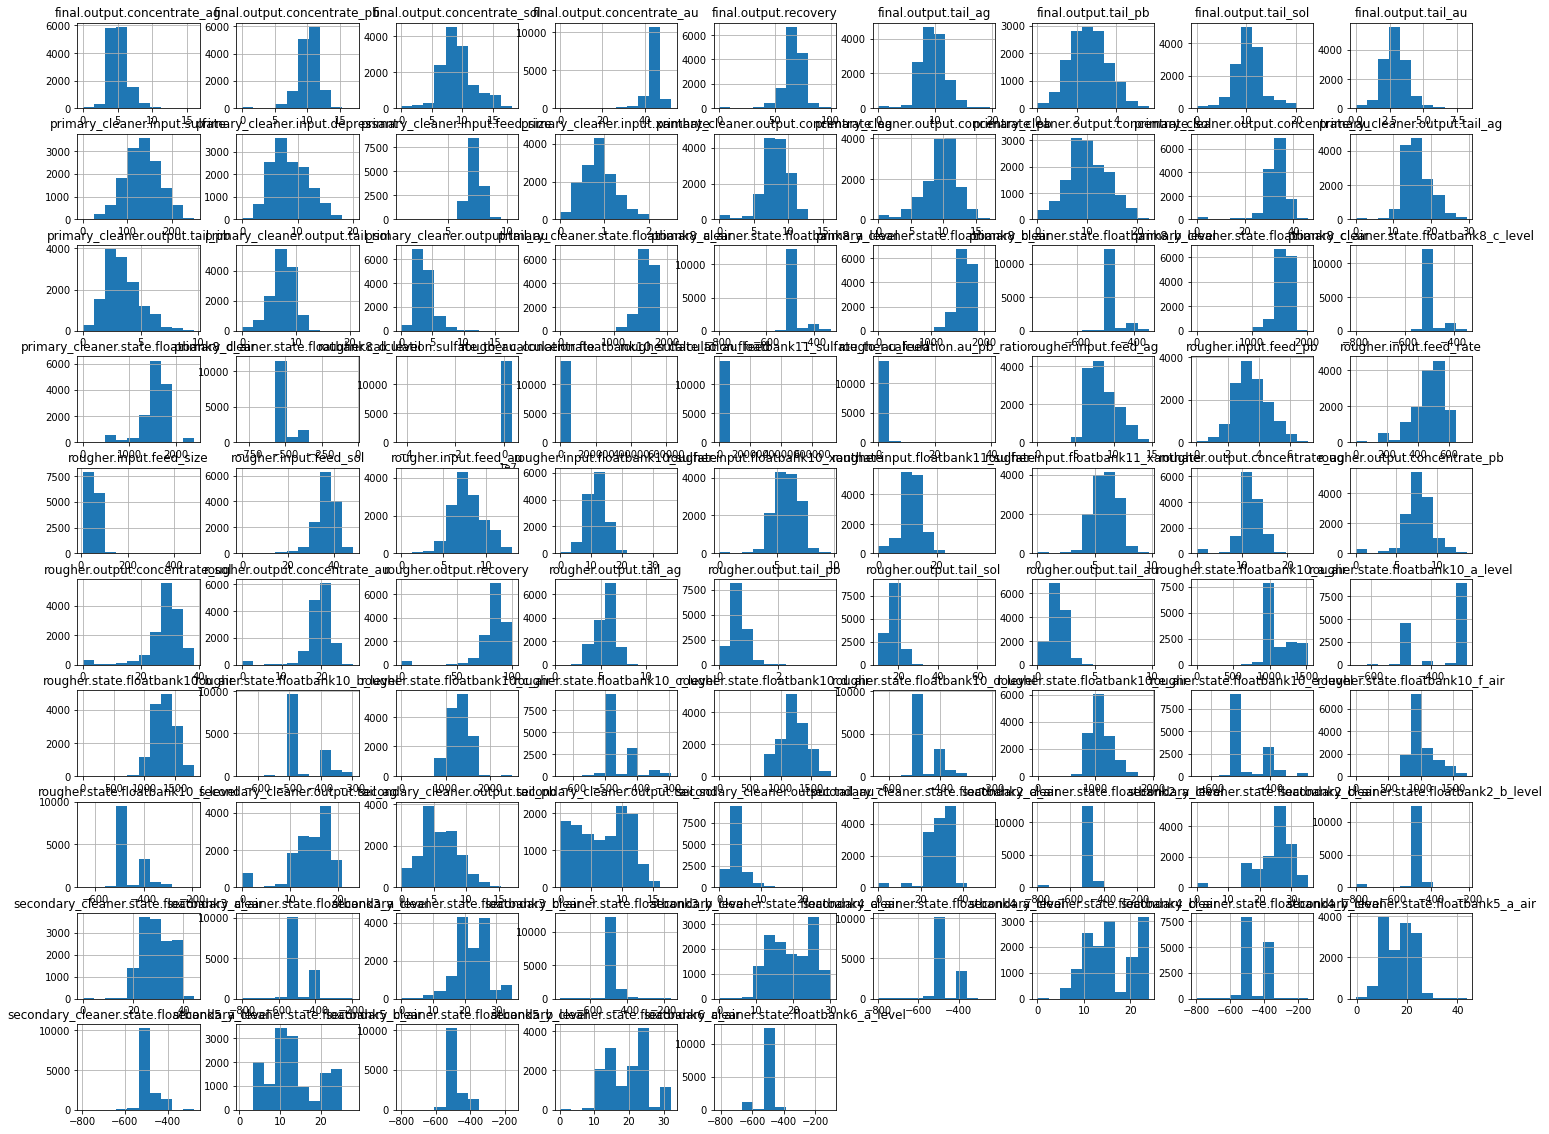

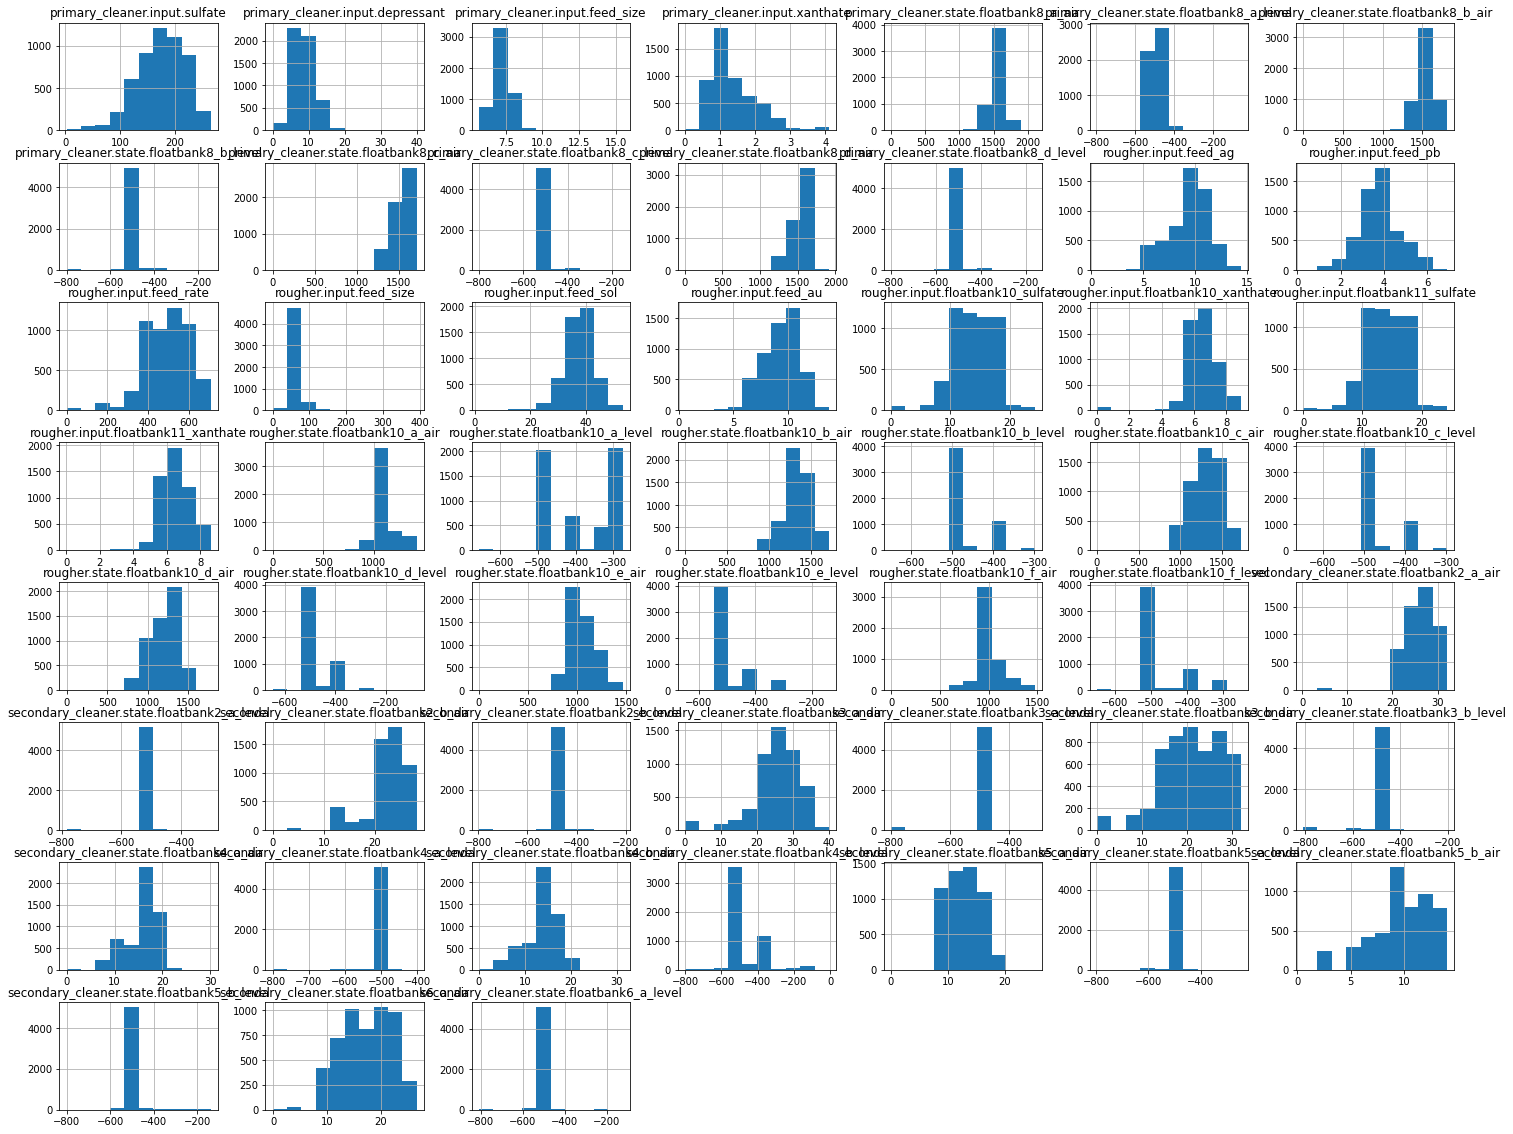

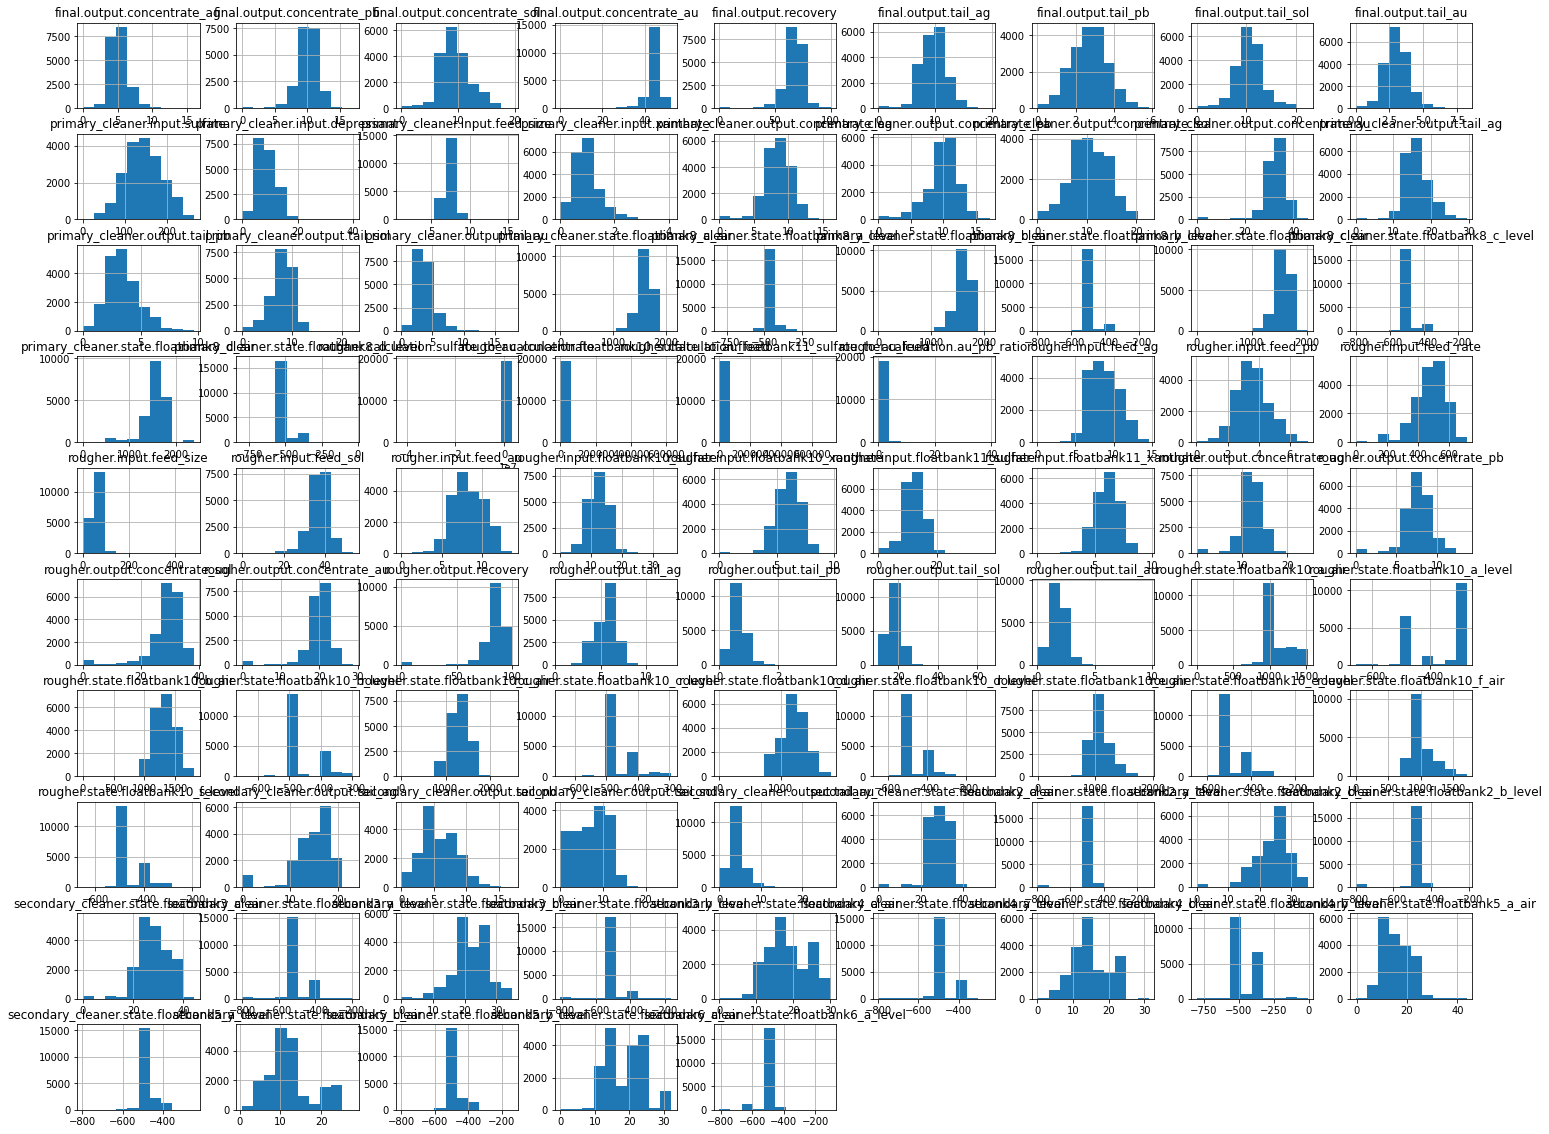

In [5]:
display(train.hist(figsize=(25, 20)));
display(test.hist(figsize=(25, 20)));
display(fullnew.hist(figsize=(25, 20)));

###  Проверка расчёта эффективности обогащения

In [6]:
#вычислим эффективность обогащения на обучающей выборке
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

In [7]:
train['calc_recovery'] = (C*(F-T))/(F*(C-T))*100
train['calc_recovery'].mean()


82.70450164550293

In [8]:
train['rougher.output.recovery'].mean() 

82.70450164550293

In [9]:
print(mean_absolute_error(train['calc_recovery'], train['rougher.output.recovery']))

9.73512347450521e-15


MAE - средний модуль разности, и показывает как сильно предсказания в среднем отличаются от истинных значений. Полученное значение мало, а значит расчеты верны.

In [10]:
# найдем признаки недоступные в тестовой выборке
missed_col = set(train.columns)-set(test.columns) 
missed_col

{'calc_recovery',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 

В тестовой выборке отсутствуют данные о продукте на всех этапах и расчётные характеристики для флотации

In [11]:
display(train.isna().sum())
display(test.isna().sum())
display(fullnew.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
calc_recovery                                   0
Length: 88, dtype: int64

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [12]:
train.ffill(axis='rows', inplace=True)
test.ffill(axis='rows', inplace=True)
fullnew.ffill(axis='rows', inplace=True)

In [13]:
train.duplicated().sum()

0

In [14]:
test.duplicated().sum()

0

In [15]:
fullnew.duplicated().sum()

0

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

In [16]:
#отфильтруем даные для серебра
df_ag = fullnew[['rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']]

In [17]:
#отфильтруем даные для свинца
df_pb = fullnew[['rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]

In [18]:
#отфильтруем даные для Au
df_au = fullnew[['rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]

Text(0.5, 0, 'Стадии очистки')

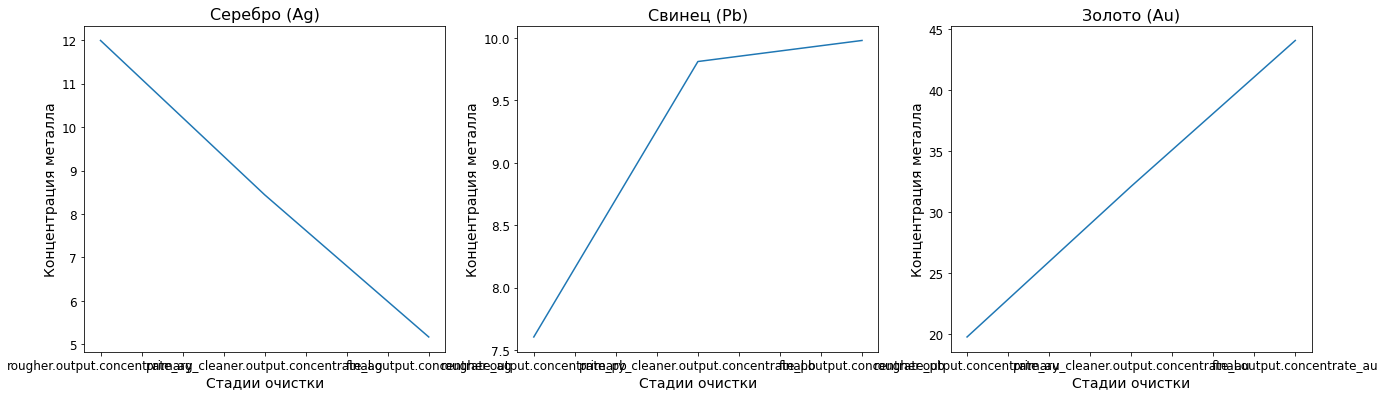

In [19]:
#построим графики для каждого металла.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, linewidth=3, figsize=(22, 6))#1 ряд, 3 графика
df_ag.mean().plot(ax=ax1, subplots=True, fontsize=12)
ax1.set_title('Серебро (Ag)', fontsize=16)
ax1.set_ylabel('Концентрация металла', fontsize=14)
ax1.set_xlabel('Стадии очистки', fontsize=14)
df_pb.mean().plot(ax=ax2, subplots=True, fontsize=12)
ax2.set_title('Свинец (Pb)', fontsize=16)
ax2.set_ylabel('Концентрация металла', fontsize=14)
ax2.set_xlabel('Стадии очистки', fontsize=14)
df_au.mean().plot(ax=ax3, subplots=True, fontsize=12)
ax3.set_title('Золото (Au)', fontsize=16)
ax3.set_ylabel('Концентрация металла', fontsize=14)
ax3.set_xlabel('Стадии очистки', fontsize=14)

Концентрация серебра понижается равномерно, золота - повышается, а концентрация свинца сначала увеличивается, а на последней стадии очистки почти не изменяется. 

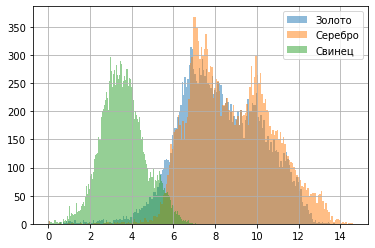

In [20]:
#построим гистограммы, чтобы посмотреть начальную концентрацию металлов
fullnew['rougher.input.feed_au'].hist(bins=200, alpha=0.5, label='Золото') #density=True)
fullnew['rougher.input.feed_ag'].hist(bins=200, alpha=0.5, label='Серебро') #density=True)
fullnew['rougher.input.feed_pb'].hist(bins=200, alpha=0.5, label='Свинец')#density=True)
#plt.xlabel('размер частиц, мк')
#plt.ylabel('количество наблюдений')
plt.legend();

На начальном этапе концентрации золота и серебра примерно одинаковы, свинца меньше. 

2.2.  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. 

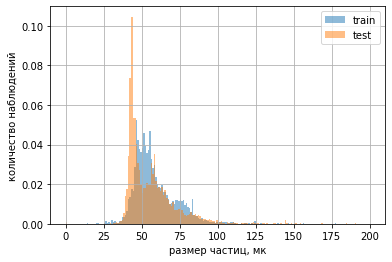

In [51]:
#построим гистограммы
train['rougher.input.feed_size'].hist(bins=200, alpha=0.5, label='train', density=True, range=(0,200))
test['rougher.input.feed_size'].hist(bins=200, alpha=0.5, label='test', density=True, range=(0,200))
plt.xlabel('размер частиц, мк')
plt.ylabel('количество наблюдений')
plt.legend();

In [22]:
display(train['rougher.input.feed_size'].describe()) 
display(test['rougher.input.feed_size'].describe()) 

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

Гистограммы распределения размеров частиц показывают, что они примерно равны, хотя тренировочная выборка имеет большое количество выбросов. Кроме того, средний размер частиц 59 и 54 микрон, что составляет не очень большую разницу, т е можно считать, что размеры равны 

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [23]:
# найдем суммарную концентрацию металлов (ag, pb, sol, au) в сырье
sum_rougher = fullnew[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)

In [24]:
# найдем суммарную концентрацию металлов (ag, pb, sol, au) в черновом концентрате 
sum_conc = fullnew[['rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)

In [25]:
# найдем суммарную концентрацию металлов (ag, pb, sol, au) в финальном концентрате 
sum_final = fullnew[['final.output.concentrate_ag', 
                   'final.output.concentrate_pb', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)

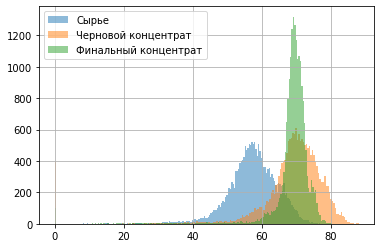

In [26]:
#построим гистограммы
sum_rougher.hist(bins=200, alpha=0.5, label='Сырье')
sum_conc.hist(bins=200, alpha=0.5, label='Черновой концентрат')
sum_final.hist(bins=200, alpha=0.5, label='Финальный концентрат') 
#plt.xlabel('размерчастиц, мк')
#plt.ylabel('количество наблюдений')
plt.legend();

Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.

In [27]:
train = train[(train['rougher.output.concentrate_au'] != 0) & (train['rougher.output.concentrate_ag'] != 0) & (train['rougher.output.concentrate_pb'] != 0) & (train['rougher.output.concentrate_sol'] != 0)]
train = train[(train['final.output.concentrate_au'] != 0) & (train['final.output.concentrate_ag'] != 0) & (train['final.output.concentrate_pb'] != 0) & (train['final.output.concentrate_sol'] != 0)]
fullnew = fullnew[(fullnew['rougher.output.concentrate_au'] != 0) & (fullnew['rougher.output.concentrate_ag'] != 0) & (fullnew['rougher.output.concentrate_pb'] != 0) & (fullnew['rougher.output.concentrate_sol'] != 0)]
fullnew = fullnew[(fullnew['final.output.concentrate_au'] != 0) & (fullnew['final.output.concentrate_ag'] != 0) & (fullnew['final.output.concentrate_pb'] != 0) & (fullnew['rougher.output.concentrate_sol'] != 0)] 

## Модель

### Напишем функцию для расчёта итоговой sMAPE

In [28]:
test = test.merge(fullnew.loc[:, ['date', 'rougher.output.recovery','final.output.recovery']], on='date')
#В завершающем шаге предобработки данных считаю нужным удалить колонку date, как не информативную для дальнейшего обучения модели.
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)

In [29]:
sings_for_delete = missed_col - set(['rougher.output.recovery','final.output.recovery'])
print('\nКоличество признаков для удаления из тренировочной выборки -', len(sings_for_delete))



Количество признаков для удаления из тренировочной выборки - 33


In [30]:
train= train.drop(columns=sings_for_delete, axis=1)

In [31]:
features_train = train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
features_test = test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']
target_train = train[['rougher.output.recovery','final.output.recovery']]
target_test = test[['rougher.output.recovery','final.output.recovery']]

In [32]:
def smape_func(target, pred):
    '''Метод получения sMape для одного этапа'''
    
    smape = abs(target-pred)/((abs(target)+abs(pred))/2)*100
    smape = smape.fillna(value=0)
    smape = np.mean(smape)
    return smape

In [33]:
def summary_smape_func(target_rouger, pred_rougher, target_final, pred_final):
    
    '''Метод для вычисления итоговой sMAPE, когда на входе target_rouger, pred_rougher, target_final, pred_final'''
    
    # вычислим smape для rouger
    smape_rouger = smape_func(target_rouger, pred_rougher)
    # вычислим smape для final
    smape_final = smape_func(target_final, pred_final)
    
    #  вычислим итоговый smape 
    summary_smape = 0.25 * smape_rouger + 0.75 * smape_final
    
    return summary_smape

In [34]:
def summary_smape(smape_rouger, smape_final):
    
    '''Метод для вычисления итоговой sMAPE, когда на входе smape_rouger и smape_final'''
    
    #  вычислим итоговый smape
    summary_smape = 0.25 * smape_rouger + 0.75 * smape_final
    
    return summary_smape

Первую функцию используем в оценке качества кросс-валидацией, а вторую использовали в качестве переходной от первой к итоговой, в ней рассчитывается sMAPE для начального и конечного этапов. В последней функции на вход мы получаем 2 значения sMape и уже рассчитываем итоговую.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape_func`, `smape_func` и `summary_smape` расчитаны верно.</font>

### Обучим несколько моделей и оценим их качество кросс-валидацией. 

In [35]:
smape_scorer = make_scorer(smape_func, greater_is_better=False)

Линейная регрессия

In [36]:
# инициируем модель линейной регрессии
model_line_reg_rougher = LinearRegression()





In [37]:
# оценим модель с помощью кроссвалидации features_train, target_train. Вычислим sMape_rougher
scores_line_reg_rougher = cross_val_score(model_line_reg_rougher,  
                                          features_train, 
                                          target_rougher, 
                                          scoring = smape_scorer,
                                          cv = 5)
smape_rougher = np.mean(abs(scores_line_reg_rougher))
print('Средняя оценка качества sMape_rougher', round(smape_rougher, 4))

Средняя оценка качества sMape_rougher 7.2725


In [38]:
# оценим модель с помощью кроссвалидации features_train, target_train. Вычислим smape_final
scores_line_reg_rougher = cross_val_score(model_line_reg_rougher,  
                                          features_train, 
                                          target_final, 
                                          scoring = smape_scorer,
                                          cv = 5)
smape_final = np.mean(abs(scores_line_reg_rougher))
print('Средняя оценка качества sMape_final', round(smape_final, 4))

Средняя оценка качества sMape_final 10.9882


In [39]:
# вычислим итоговую оценку sMape
smape_total = summary_smape(smape_rougher, smape_final)
print('Средняя итоговая оценка качества модели sMape ', round(smape_total, 4))

Средняя итоговая оценка качества модели sMape  10.0593


Дерево решений

In [40]:
# Проведем оценку для этапа rougher
# Инициируем модель дерева решений
model_dtree_rougher = DecisionTreeRegressor(random_state=12345, max_depth = 10)
# обучим модель
model_dtree_rougher.fit(features_train, target_rougher)
# оценим модель с помощью кроссвалидации features_train, target_train. Вычислим sMape_rougher
scores_dtree_rougher = cross_val_score(model_dtree_rougher,  
                                          features_train, 
                                          target_rougher, 
                                          scoring = smape_scorer,
                                          cv = 5)
smape_rougher = np.mean(abs(scores_dtree_rougher))
print('Средняя оценка качества smape_rougher', round(smape_rougher, 4))


Средняя оценка качества smape_rougher 10.264


In [41]:
# Проведем оценку для этапа final
# Инициируем модель дерева решений
model_dtree_final = DecisionTreeRegressor(random_state=12345, max_depth = 10)
# обучим модель
model_dtree_final.fit(features_train, target_final)
# оценим модель с помощью кроссвалидации features_train, target_train. Вычислим sMape_rougher
scores_dtree_final = cross_val_score(model_dtree_final,  
                                          features_train, 
                                          target_final, 
                                          scoring = smape_scorer,
                                          cv = 5)
smape_final = np.mean(abs(scores_dtree_final))
print('Средняя оценка качества smape_final', round(smape_final, 4))

Средняя оценка качества smape_final 14.3493


In [42]:
# вычислим итоговую оценку sMape
smape_total = summary_smape(smape_rougher, smape_final)
print('Средняя итоговая оценка качества модели sMape', round(smape_total, 4))

Средняя итоговая оценка качества модели sMape 13.328


In [43]:
%%time
# Проведем оценку модели дерева решений но уже с подбором параметра глубины для этапа rougher
# Инициируем модель дерева решений
model_dtree_rougher = DecisionTreeRegressor(random_state=12345)
# подберем оптимальные параметры глубины дерева
parameters = {'max_depth': [x for x in range(1, 30, 2)]}
grid_dt_rougher = GridSearchCV(model_dtree_rougher,
                               parameters, 
                               cv=5, 
                               scoring=smape_scorer)
grid_dt_rougher.fit(features_train, target_rougher)                                     
                                            
# GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
           #  param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                      # 23, 25, 27, 29]},
            # scoring=make_scorer(smape_func, greater_is_better=False))
# Смотрим лучшие параметры по глубине. Значение smape берем по модулю
print(grid_dt_rougher.best_params_)
print('Значение smape_rougher берем по модулю', abs(round(grid_dt_rougher.best_score_, 3)))



{'max_depth': 3}
Значение smape_rougher берем по модулю 7.356
CPU times: user 40.3 s, sys: 29.3 ms, total: 40.3 s
Wall time: 40.3 s


In [44]:
%%time
# Проведем оценку модели дерева решений но уже с подбором параметра глубины для этапа final
# Инициируем модель дерева решений
model_dtree_final = DecisionTreeRegressor(random_state=12345)
# подберем оптимальные параметры глубины дерева
parameters = {'max_depth': [x for x in range(1, 30, 2)]}
grid_dt_final = GridSearchCV(model_dtree_final,
                               parameters, 
                               cv=5, 
                               scoring=smape_scorer)
grid_dt_final.fit(features_train, target_final)
# Смотрим лучшие параметры по глубине. Значение smape берем по модулю
print(grid_dt_final.best_params_)
print('Значение smape_final берем по модулю', abs(round(grid_dt_final.best_score_, 3)))


{'max_depth': 3}
Значение smape_final берем по модулю 9.449
CPU times: user 43.1 s, sys: 63.2 ms, total: 43.2 s
Wall time: 43.2 s


In [45]:
# вычислим итоговую оценку dtree_smape_total
dtree_smape_total = summary_smape(abs(round(grid_dt_rougher.best_score_, 3)), abs(round(grid_dt_final.best_score_, 3)))
print('Средняя итоговая оценка качества модели dtree_smape_total', round(smape_total, 4))

Средняя итоговая оценка качества модели dtree_smape_total 13.328


Случайный лес

In [46]:
%%time
# Проведем оценку модели случайного леса с заданными параметрами для этапа rougher
#  инициируем модель случайного леса
model_rf_rougher = RandomForestRegressor(random_state=12345, max_depth = 10, n_estimators=20)
# оценим модель с помощью кроссвалидации 
scores_rf_rougher = cross_val_score(model_rf_rougher,
                                    features_train, 
                                    target_rougher,
                                    scoring=smape_scorer,
                                    cv = 5)
smape_rf_rougher = np.mean(abs(scores_rf_rougher))
print('Средняя оценка качества модели final_score_rf_rougher', round(smape_rf_rougher, 4))









Средняя оценка качества модели final_score_rf_rougher 7.31
CPU times: user 27.7 s, sys: 37.9 ms, total: 27.8 s
Wall time: 27.9 s


In [47]:
%%time
# Проведем оценку модели случайного леса с заданными параметрами для этапа final
#  инициируем модель случайного леса
model_rf_final = RandomForestRegressor(random_state=12345, max_depth = 10, n_estimators=20)
# оценим модель с помощью кроссвалидации features_train, target_train
scores_rf_final = cross_val_score(model_rf_final,
                                    features_train, 
                                    target_final, 
                                    scoring=smape_scorer,
                                    cv = 5)
smape_rf_final = np.mean(abs(scores_rf_final))
print('Средняя оценка качества модели final_score_rf_rougher', round(smape_rf_final, 4))

Средняя оценка качества модели final_score_rf_rougher 10.0143
CPU times: user 28.3 s, sys: 58.7 ms, total: 28.4 s
Wall time: 28.4 s


In [48]:
# вычислим итоговую оценку smape_rf_total 
smape_rf_total = summary_smape(smape_rf_rougher, smape_rf_final)
print('Средняя итоговая оценка качества модели smape_rf_total', round(smape_rf_total, 4))


Средняя итоговая оценка качества модели smape_rf_total 9.3382


В ходе обучения и проверки качества моделей наилучшие значения итоговой оценки показала модель случайного леса - 9,3.
Теперь мы можем выполнить расчёт параметра smape на тестовых данных.

### Расчёт по выбранной модели

In [49]:

def rf_model(features_train, target_train, features_test, depth, estimators):
    # метод прогнозирования целевого признаки на случайном лесе
    # инициируем модель с лучшими параметрами
    model_rf = RandomForestRegressor(random_state=12345, max_depth = depth, n_estimators=estimators)
    # обучим модель
    model_rf.fit(features_train, target_train)
    # подготовим прогноз целевого признака
    pred_test_rf = model_rf.predict(features_test)
    return pred_test_rf
# спрогнозируем эффективность для этапа rougher
pred_test_rougher = rf_model(features_train, target_train['rougher.output.recovery'], features_test, 5, 150)
# спрогнозируем эффективность для этапа final
pred_test_final = rf_model(features_train, target_train['final.output.recovery'], features_test, 5, 200)
# рассчитаем smape на тестовых данных
smape_test = summary_smape_func(target_test['rougher.output.recovery'], 
                                pred_test_rougher,
                                target_test['final.output.recovery'],
                                pred_test_final                               
                               )
print('Итоговая оценка smape на тестовых данных равна', round(smape_test, 2))

Итоговая оценка smape на тестовых данных равна 7.31


### Проверка модели на адекватность

In [50]:

def const_model(features_train, target_train, features_test):
    # метод прогнозирования целевого признаки на константной модели 
    # инициируем модель с лучшими параметрами
    dummy_regr = DummyRegressor(strategy="mean")
    # обучим модель
    dummy_regr.fit(features_train, target_train)
  # подготовим прогноз целевого признака
    pred_test = dummy_regr.predict(features_test)
    return pred_test
# построим прогноз константной модели для этапа rougher
pred_test_rougher_const = const_model(features_train, target_train['rougher.output.recovery'], features_test)
# построим прогноз константной модели для этапа final
pred_test_final_const = const_model(features_train, target_train['final.output.recovery'], features_test)
# рассчитаем smape на тестовых данных
smape_test_const = summary_smape_func(target_test['rougher.output.recovery'], 
                                pred_test_rougher_const,
                                target_test['final.output.recovery'],
                                pred_test_final_const                               
                               )
print('Итоговая оценка smape константной модели на тестовых данных равна', round(smape_test_const, 3))

Итоговая оценка smape константной модели на тестовых данных равна 7.765


### Выводы:
MAE - средний модуль разности, и показывает как сильно предсказания в среднем отличаются от истинных значений. Полученное значение мало, а значит расчеты эффективности обогащения верны.
В тестовой выборке отсутствуют данные о продукте на всех этапах и расчётные характеристики для флотации
На начальном этапе концентрации золота и серебра примерно одинаковы, свинца меньше. 
Концентрация серебра понижается равномерно, золота - повышается, а концентрация свинца сначала увеличивается, а на последней стадии очистки почти не изменяется.
Гистограммы распределения размеров частиц показывают, что они примерно равны, хотя тренировочная выборка имеет большое количество выбросов. Кроме того, средний размер частиц 59 и 54 микрон, что составляет не очень большую разницу, т е можно считать, что размеры равны
Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается.
Обучены модели линейной регрессии, дерева решений и случайного леса, наилучшая итоговая оценка качества у модели случайного леса - 9,3. Проведен расчет на тестовой модели и проведена проверка на адекватность на константной модели.
Итоговая оценка smape на тестовых данных равна 7.31